# **Fetch - Data Analyst Takehome Assessment**
#### Ryan Kawamura 
#### RyanKawamura@g.ucla.edu

### Import Packages

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import Data

In [37]:
products = pd.read_csv("PRODUCTS_TAKEHOME.csv")
transaction = pd.read_csv("TRANSACTION_TAKEHOME.csv")
user = pd.read_csv("USER_TAKEHOME.csv")

# **Exercise 1 - Explore the Data**
Review the unstructured csv files and answer the following questions with code that supports your conclusions:
- Are there any data quality issues present?
- Are there any fields that are challenging to understand?

## **1a) Are there any data quality issues present?**

## **Products** Dataframe

In [38]:
# View of first 5 rows of dataframe
products.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [39]:
# Standard overview of dataframe columns, non-null count, column names, and data types
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


Considering that the column length is 845552, all of the columns contain null values, some columns such as CATEGORY_4 having as much as 778093 null values. This is an issue because this means that there are many data values that are blank, which means that we have incomplete data.

In [119]:
# Code to check the number of null values in each column
x_product = []
y_product = []
for i in range(len(products.columns)):
    count_null = sum(products[products.columns[i]].isnull())    
    print(products.columns[i], ":", count_null, "Null Values")
    x_product.append(products.columns[i])
    y_product.append(count_null)

CATEGORY_1 : 111 Null Values
CATEGORY_2 : 1424 Null Values
CATEGORY_3 : 60566 Null Values
CATEGORY_4 : 778093 Null Values
MANUFACTURER : 226474 Null Values
BRAND : 226472 Null Values
BARCODE : 4025 Null Values


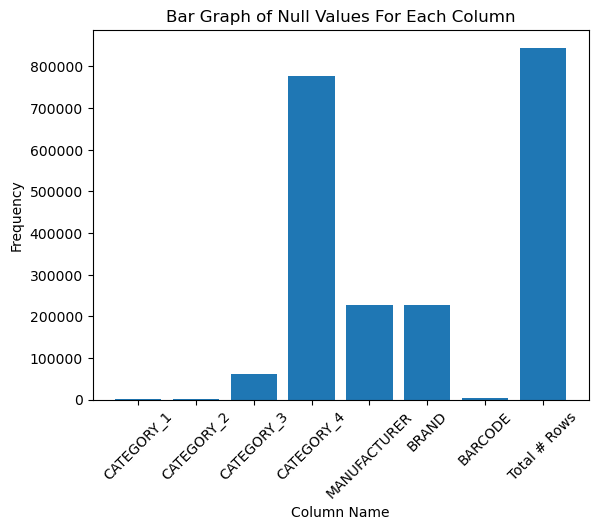

In [120]:
# Creating a bar graph to visualize the amount of null values and compare it to total number of rows
x_product.append("Total # Rows")
y_product.append(len(products))

plt.bar(x_product, y_product)
plt.title("Bar Graph of Null Values For Each Column")
plt.ylabel("Frequency")
plt.xlabel("Column Name")
plt.xticks(rotation = 45)
plt.show()

From the visualization, it is clear how many missing values there are in each column, CATEGORY_4 having almost as many null values as missing rows. This appears to be a data quality issue.

### High Level Exploratory Data Analysis on CATEGORY_1 Null Values

In [6]:
# Check the distinct values in CATEGORY_1
print(products["CATEGORY_1"].unique())

['Health & Wellness' 'Snacks' 'Beverages' 'Pantry' 'Alcohol'
 'Apparel & Accessories' 'Restaurant' 'Needs Review' 'Dairy'
 'Home & Garden' nan 'Household Supplies' 'Meat & Seafood' 'Deli & Bakery'
 'Sporting Goods' 'Produce' 'Office & School' 'Frozen'
 'Arts & Entertainment' 'Animals & Pet Supplies' 'Electronics' 'Beauty'
 'Toys & Games' 'Mature' 'Vehicles & Parts' 'Baby & Toddler'
 'Luggage & Bags' 'Media']


In [7]:
# Check the distinct values in CATEGORY_2
print(products["CATEGORY_2"].unique())

['Sexual Health' 'Puffed Snacks' 'Hair Care' 'Oral Care'
 'Medicines & Treatments' 'Deodorant & Antiperspirant' 'Snack Bars' nan
 'Bath & Body' 'Nuts & Seeds' 'Candy' 'Cookies' 'Variety Snack Packs'
 'Hair Removal' 'Medical Supplies & Equipment' 'Chips' 'Snack Cakes'
 'Skin Care' 'Dessert Toppings' 'Eye Care' 'Fruit & Vegetable Snacks'
 'Snack Mixes' 'Crackers' 'Jerky & Dried Meat'
 'Topical Muscle & Joint Relief Treatments' 'Foot Care' 'First Aid'
 'Ear Care' 'Menstrual Care' 'Pretzels' 'Trail Mix' 'Dips & Salsa'
 'Adult Incontinence' 'Water' 'Cereal, Granola, & Toaster Pastries' 'Wine'
 'Pudding & Gelatin' 'Clothing' 'Carbonated Soft Drinks'
 'Energy & Endurance' 'Beverages' 'Cheese' 'Kitchen & Dining'
 'Energy Drinks' 'Packaged Vegetables' 'Household Cleaning Supplies'
 'Business & Home Security'
 'Hard Seltzers, Sodas, Waters, Lemonades & Teas' 'Beer' 'Fresh Seafood'
 'Packaged Meals & Sides' 'Prepared Meals' 'Jewelry' 'Exercise & Fitness'
 'Pasta & Noodles' 'Packaged Fruit & Apple

Checking rows of dataframe where CATEGORY_1 is null

In [9]:
# View entire table to see any patterns visually 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)

# Table with Null values in CATEGORY_1
products[products["CATEGORY_1"].isnull()]

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
5184,NaN,NaN,NaN,NaN,KEURIG DR PEPPER,POLAR,7.153711e+11
15048,NaN,NaN,NaN,NaN,THE COCA-COLA COMPANY,COCA-COLA,1.963655e+11
25313,NaN,NaN,NaN,NaN,MOLSONCOORS,COORS LIGHT,1.981811e+11
35604,NaN,NaN,NaN,NaN,THE COCA-COLA COMPANY,COCA-COLA,1.969831e+11
43214,NaN,NaN,NaN,NaN,KEURIG DR PEPPER,POLAR,6.443761e+11
49899,NaN,NaN,NaN,NaN,GENERAL MILLS,CHEERIOS,5.111114e+11
53253,NaN,NaN,NaN,NaN,MOLSONCOORS,COORS LIGHT,1.981811e+11
64977,NaN,NaN,NaN,NaN,MOLSONCOORS,COORS LIGHT,1.981811e+11
67458,NaN,NaN,NaN,NaN,THE COCA-COLA COMPANY,COCA-COLA,4.900008e+10
70290,NaN,NaN,NaN,NaN,THE COCA-COLA COMPANY,COCA-COLA,1.973151e+11


Through looking at this data frame that only shows the dataframe where "CATEGORY_1" values are null, we can see common companies that apear as well as a common type of product (beverages and snacks). 

In [10]:
# Looking at the MANUFACTURER with null values in CATEGORY_1
print(products[products["CATEGORY_1"].isnull()]["MANUFACTURER"].unique())

['KEURIG DR PEPPER' 'THE COCA-COLA COMPANY' 'MOLSONCOORS' 'GENERAL MILLS'
 'MARS WRIGLEY' 'PEPSICO' 'SARGENTO' 'GALLO']


In [11]:
# Looking at the BRAND with null values in CATEGORY_1
products[products["CATEGORY_1"].isnull()]["BRAND"].unique()

array(['POLAR', 'COCA-COLA', 'COORS LIGHT', 'CHEERIOS', 'SNICKERS',
       'CHEETOS', 'FRITO-LAY', 'BUBLY SPARKLING WATER', 'PEPSI',
       'SARGENTO', 'BAREFOOT'], dtype=object)

In [13]:
# Check other products from the Coca Cola Company manufacturer
products[products["MANUFACTURER"] == "THE COCA-COLA COMPANY"].head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
836,Beverages,Carbonated Soft Drinks,Cola,Regular Cola,THE COCA-COLA COMPANY,COCA-COLA,7.627654e+11
2761,Home & Garden,Kitchen & Dining,Food & Beverage Carriers,Water Bottles,THE COCA-COLA COMPANY,COCA-COLA,1.968995e+11
3361,Beverages,Carbonated Soft Drinks,Cola,Regular Cola,THE COCA-COLA COMPANY,COCA-COLA,6.546907e+11
4687,Beverages,Carbonated Soft Drinks,Cola,Regular Cola,THE COCA-COLA COMPANY,COCA-COLA,4.900005e+10
4858,Beverages,Carbonated Soft Drinks,Cola,Regular Cola,THE COCA-COLA COMPANY,COCA-COLA,4.900007e+10


After doing online research, I believe that the brands with NAN category columns, it could belong in 'beverages' CATEGORY_1 or 'snacks' CATEGORY_1, so I believe that this is one proof of an issue in the quality of the data. Based off of my analysis and outside research, I believe that this is a data quality issue because there is an appropriate value that can be entered in these columns, however they are null values.

### Check for duplicated rows of primary key (Barcode)

In [122]:
# Checking if there are any duplicates of the primary key
any(products["BARCODE"].duplicated()) 

True

In [121]:
# Checking the duplicate rows
products_no_nan = products.dropna(subset = ["BARCODE"])
products_no_nan[products_no_nan["BARCODE"].duplicated()].head(10)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
76394,Snacks,Candy,Gum,NaN,THE HERSHEY COMPANY,ICE BREAKERS,3498507.0
87568,Snacks,Chips,Crisps,NaN,TRADER JOE'S,TRADER JOE'S,952811.0
100470,Snacks,Candy,Confection Candy,NaN,"LIDL US, LLC",LIDL,20744731.0
151285,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,REESE'S,3417607.0
181902,Snacks,Candy,Confection Candy,NaN,GRUPO NACIONAL DE CHOCOLATES SA,NUTRESA,75053055.0
193347,Snacks,Candy,Chocolate Candy,NaN,MARS WRIGLEY,M&M'S,4003207.0
202683,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,CADBURY,3436608.0
228956,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,REESE'S,3444306.0
233016,Snacks,Dessert Toppings,Ice Cream Sauces & Syrups,NaN,THE HERSHEY COMPANY,HERSHEY'S,3412503.0
234764,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,KIT KAT,5289516.0


In [105]:
products[products["BARCODE"] == 3.498507e+06] #check

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
69016,Snacks,Candy,Gum,NaN,THE HERSHEY COMPANY,ICE BREAKERS,3498507.0
76394,Snacks,Candy,Gum,NaN,THE HERSHEY COMPANY,ICE BREAKERS,3498507.0


In [108]:
products[products["BARCODE"] == 952811.0] #check

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
14607,Snacks,Chips,Crisps,NaN,TRADER JOE'S,TRADER JOE'S,952811.0
87568,Snacks,Chips,Crisps,NaN,TRADER JOE'S,TRADER JOE'S,952811.0


In [111]:
# Creating a table to see the duplicate rows 
products_no_nan[products_no_nan["BARCODE"].duplicated(keep = False)].sort_values(by = "BARCODE").head(20)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
349945,Snacks,Candy,Confection Candy,NaN,MARS WRIGLEY,STARBURST,400510.0
99568,Snacks,Candy,Confection Candy,NaN,MARS WRIGLEY,STARBURST,400510.0
139121,Snacks,Candy,Chocolate Candy,NaN,PLACEHOLDER MANUFACTURER,BRAND NOT KNOWN,404310.0
841230,Snacks,Candy,Chocolate Candy,NaN,MARS WRIGLEY,M&M'S,404310.0
274321,Snacks,Crackers,Graham Crackers,NaN,TRADER JOE'S,TRADER JOE'S,438711.0
684662,Snacks,Crackers,Graham Crackers,NaN,TRADER JOE'S,TRADER JOE'S,438711.0
486969,Snacks,Fruit & Vegetable Snacks,Dried Vegetables,NaN,TRADER JOE'S,TRADER JOE'S,563178.0
743615,Snacks,Fruit & Vegetable Snacks,Dried Vegetables,NaN,TRADER JOE'S,TRADER JOE'S,563178.0
269354,Snacks,Nuts & Seeds,Cashews,NaN,TRADER JOE'S,TRADER JOE'S,603898.0
756110,Snacks,Nuts & Seeds,Cashews,NaN,TRADER JOE'S,TRADER JOE'S,603898.0


Can see that some rows with the same barcode appear to be duplicates of each other while others appear to have different data in the different columns. 

## Data Quality Issues for **Products** Table
### #1: Many Null Values, especially in CATEGORY_4. This is an issue because that means we have incomplete data. 
- CATEGORY_1: 111 Null Values
- CATEGORY_2: 1,424 Null Values
- CATEGORY_3: 60,566 Null Values
- CATEGORY_4: 778,092 Null Values
- MANUFACTURER: 226,474 Null Values
- BARCODE: 4025 Null Values 

Null Values in the Barcode section are especially an issue because they are the primary key that is used in relation to the transactions table



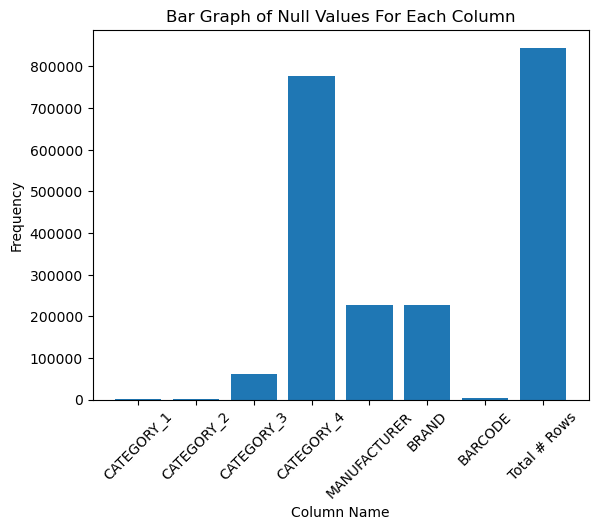

In [62]:
plt.bar(x_product, y_product)
plt.title("Bar Graph of Null Values For Each Column")
plt.ylabel("Frequency")
plt.xlabel("Column Name")
plt.xticks(rotation = 45)
plt.show()

### #2: There are duplicates in the BARCODE column which is an issue because it is a primary key.

There are two instances of duplicates:

a) Duplicate rows (ie the same data in the rows)

In [112]:
products[products["BARCODE"] == 3.498507e+06]

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
69016,Snacks,Candy,Gum,NaN,THE HERSHEY COMPANY,ICE BREAKERS,3498507.0
76394,Snacks,Candy,Gum,NaN,THE HERSHEY COMPANY,ICE BREAKERS,3498507.0


b) Same barcode, different product/data

In [113]:
products[products["BARCODE"] == 701983.0]

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
610681,Snacks,Nuts & Seeds,Snack Seeds,NaN,SUNRIDGE FARMS,SUNRIDGE FARMS,701983.0
645266,Snacks,Chips,Crisps,NaN,TRADER JOE'S,TRADER JOE'S,701983.0


## **USERS** Dataframe

In [123]:
# Check first five rows of user dataframe
user.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [124]:
# Check basic info about the dataframe
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


In [63]:
# Print the number of null values in each of the columns
x_user = []
y_user = []
for i in range(len(user.columns)):
    count_null = sum(user[user.columns[i]].isnull())    
    print(user.columns[i], ":", count_null, "Null Values")
    x_user.append(user.columns[i])
    y_user.append(count_null)

ID : 0 Null Values
CREATED_DATE : 0 Null Values
BIRTH_DATE : 3675 Null Values
STATE : 4812 Null Values
LANGUAGE : 30508 Null Values
GENDER : 5892 Null Values


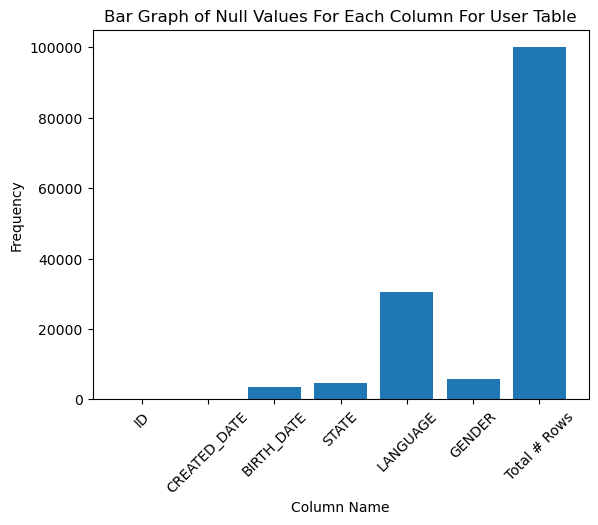

In [64]:
# Bar graph to visualize number of null values vs. number of total rows
x_user.append("Total # Rows")
y_user.append(len(user))

plt.bar(x_user, y_user)
plt.title("Bar Graph of Null Values For Each Column For User Table")
plt.ylabel("Frequency")
plt.xlabel("Column Name")
plt.xticks(rotation = 45)
plt.show()

### Exploratory Data Analysis into BIRTH_DATE column

In [65]:
# Looking at first ten BIRTH_DATE values
user["BIRTH_DATE"].head(10)

0    2000-08-11 00:00:00.000 Z
1    2001-09-24 04:00:00.000 Z
2    1994-10-28 00:00:00.000 Z
3                          NaN
4    1972-03-19 00:00:00.000 Z
5    1999-10-27 04:00:00.000 Z
6    1983-09-25 22:57:25.000 Z
7    1970-02-16 05:00:00.000 Z
8    1982-12-22 05:00:00.000 Z
9    1992-05-03 04:00:00.000 Z
Name: BIRTH_DATE, dtype: object

There appears to be inconsistent level of accuracy of data within the BIRTH_DATE column. Some birth dates contain a specific time, some contain an hour, and some do not include there birthday.

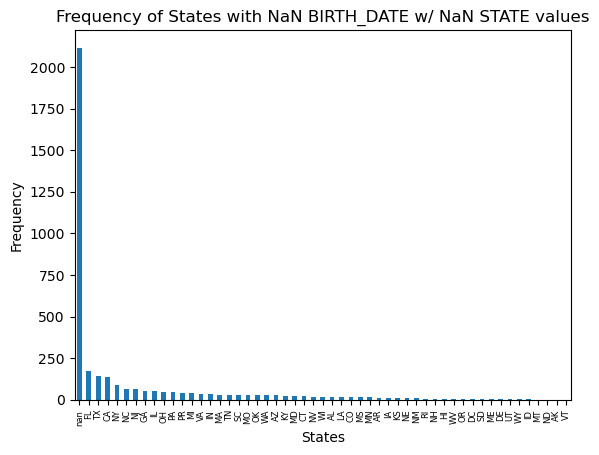

In [125]:
# Check states of people to see if there is a correlation to location including NaN
states = user[user["BIRTH_DATE"].isnull()]["STATE"]
freq = pd.Series(states).value_counts(dropna = False)

freq.plot(kind = "bar")
plt.title("Frequency of States with NaN BIRTH_DATE w/ NaN STATE values")
plt.xlabel("States")
plt.ylabel("Frequency")
plt.xticks(fontsize = 6)
plt.show()

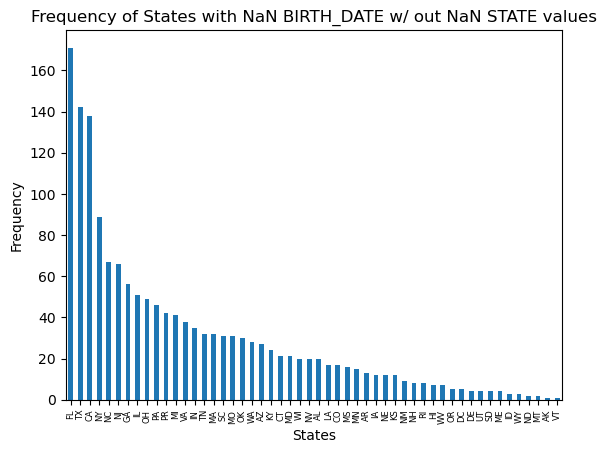

In [20]:
# Check states of people to see if there is a correlation to location without NaN
states = user[user["BIRTH_DATE"].isnull()]["STATE"]
freq = pd.Series(states).value_counts()

freq.plot(kind = "bar")
plt.title("Frequency of States with NaN BIRTH_DATE w/ out NaN STATE values")
plt.xlabel("States")
plt.ylabel("Frequency")
plt.xticks(fontsize = 6)
plt.show()

In [114]:
# Checking to see if any IDs are duplicated because this appears to be a primary key
any(user["ID"].duplicated())

False

## Data Quality Issues for **User** Table

### #1: Null Values in the data indicating an incomplete dataset
- ID : 0 Null Values
- CREATED_DATE : 0 Null Values
- BIRTH_DATE : 3675 Null Values
- STATE : 4812 Null Values
- LANGUAGE : 30508 Null Values
- GENDER : 5892 Null Values


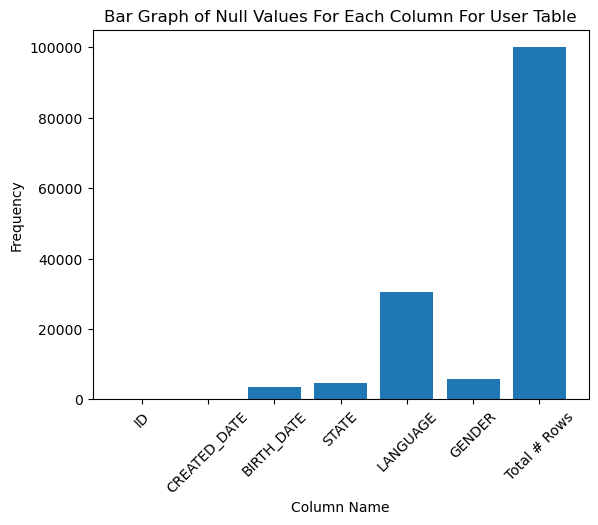

In [67]:
plt.bar(x_user, y_user)
plt.title("Bar Graph of Null Values For Each Column For User Table")
plt.ylabel("Frequency")
plt.xlabel("Column Name")
plt.xticks(rotation = 45)
plt.show()

### #2: BIRTH_DATE has different levels of accuracy
- Some of the BIRTH_DATE data values are accurate to the second, to the hour, or to the day. This inconcistency in accuracy of data may cause issues later in analysis

## **TRANSACTION** table

In [24]:
# Look at first 5 rows of dataframe
transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [25]:
# Check basic information about the dataframe
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [126]:
# Check number of null values
x_trans = []
y_trans = []
for i in range(len(transaction.columns)):
    count_null = sum(transaction[transaction.columns[i]].isnull())    
    print(transaction.columns[i], ":", count_null, "Null Values")
    x_trans.append(transaction.columns[i])
    y_trans.append(count_null)

RECEIPT_ID : 0 Null Values
PURCHASE_DATE : 0 Null Values
SCAN_DATE : 0 Null Values
STORE_NAME : 0 Null Values
USER_ID : 0 Null Values
BARCODE : 5762 Null Values
FINAL_QUANTITY : 0 Null Values
FINAL_SALE : 0 Null Values


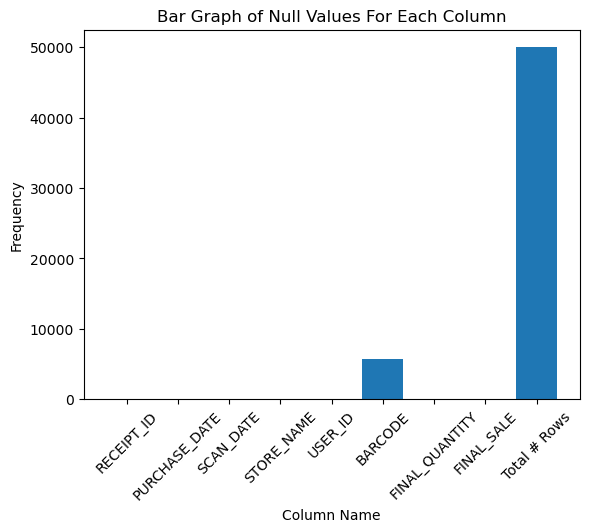

In [69]:
# Visualization to see number of null values vs the total number of rows
x_trans.append("Total # Rows")
y_trans.append(len(transaction))

plt.bar(x_trans, y_trans)
plt.title("Bar Graph of Null Values For Each Column")
plt.ylabel("Frequency")
plt.xlabel("Column Name")
plt.xticks(rotation = 45)
plt.show()

### Check for duplicates in RECEIPT_ID

In [26]:
transaction["RECEIPT_ID"].duplicated().any()

True

In [127]:
# Look at instances where the RECEIPT_ID is duplicated
transaction_no_nan = transaction.dropna(subset = ["RECEIPT_ID"])
transaction_no_nan = transaction_no_nan[transaction_no_nan["RECEIPT_ID"].duplicated()]
transaction_no_nan[transaction_no_nan["RECEIPT_ID"].duplicated(keep = False)].sort_values(by = "RECEIPT_ID").head(20)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
42,007d3232-3990-497f-a081-549e9e7a478b,2024-06-25,2024-06-27 21:21:53.442 Z,DOLLAR TREE STORES INC,63a8dbf101cb7c888c6ad87d,7.920006e+10,1.00,
40498,007d3232-3990-497f-a081-549e9e7a478b,2024-06-25,2024-06-27 21:21:53.442 Z,DOLLAR TREE STORES INC,63a8dbf101cb7c888c6ad87d,7.920006e+10,1.00,1.25
45553,007d3232-3990-497f-a081-549e9e7a478b,2024-06-25,2024-06-27 21:21:53.442 Z,DOLLAR TREE STORES INC,63a8dbf101cb7c888c6ad87d,7.920006e+10,1.00,1.25
70,00bf741b-24d6-4064-a267-f87748bb5aa9,2024-07-09,2024-07-09 17:37:14.702 Z,ALDI,62676081ed0f8765fb700454,NaN,1.00,
43639,00bf741b-24d6-4064-a267-f87748bb5aa9,2024-07-09,2024-07-09 17:37:14.702 Z,ALDI,62676081ed0f8765fb700454,NaN,1.00,5.49
28079,00bf741b-24d6-4064-a267-f87748bb5aa9,2024-07-09,2024-07-09 17:37:14.702 Z,ALDI,62676081ed0f8765fb700454,NaN,2.00,7.58
152,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19,2024-08-19 11:19:59.681 Z,MEIJER,646bdaa67a342372c857b958,4.125022e+10,1.00,
41005,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19,2024-08-19 11:19:59.681 Z,MEIJER,646bdaa67a342372c857b958,4.125022e+10,1.00,3.79
45071,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19,2024-08-19 11:19:59.681 Z,MEIJER,646bdaa67a342372c857b958,4.125009e+10,1.00,2.49
163,01a70fe0-026f-4bea-9da4-7d13bbf21e9a,2024-09-02,2024-09-07 16:02:39.835 Z,WALMART,614e733372ba844aa8dc345e,4.178900e+10,zero,0.52


There appear to be different types of rows which have duplicate receipt ids. Some appear to be duplicated rows and other have different barcodes, final_quantity, or final_sale. I believe that the duplicate rows with different barcdoes and final_quantity and final_sale are not data issues because this means that different things were purchased through the receipt, but when they have duplicate rows, I believe that to be an issue.

There are two cases where that I think might have caused this issue. 

1) They bought two of the same thing. However, this is still a data issue because the row should have gotten rid of one of the rows and doubled the final quantity
2) This is simply a data quality issue of duplicate rows

### Check FINAL_QUANTITY column

In [74]:
transaction["FINAL_QUANTITY"].unique()

array(['1.00', 'zero', '2.00', '3.00', '4.00', '4.55', '2.83', '2.34',
       '0.46', '7.00', '18.00', '12.00', '5.00', '2.17', '0.23', '8.00',
       '1.35', '0.09', '2.58', '1.47', '16.00', '0.62', '1.24', '1.40',
       '0.51', '0.53', '1.69', '6.00', '2.39', '2.60', '10.00', '0.86',
       '1.54', '1.88', '2.93', '1.28', '0.65', '2.89', '1.44', '2.75',
       '1.81', '276.00', '0.87', '2.10', '3.33', '2.54', '2.20', '1.93',
       '1.34', '1.13', '2.19', '0.83', '2.61', '0.28', '1.50', '0.97',
       '0.24', '1.18', '6.22', '1.22', '1.23', '2.57', '1.07', '2.11',
       '0.48', '9.00', '3.11', '1.08', '5.53', '1.89', '0.01', '2.18',
       '1.99', '0.04', '2.25', '1.37', '3.02', '0.35', '0.99', '1.80',
       '3.24', '0.94', '2.04', '3.69', '0.70', '2.52', '2.27'],
      dtype=object)

From this output of the unique values in the FINAL_QUANTITY column, we can see that instead of 0 being a float type like all of the other values, it is 'zero'. This is a data quality issue because the data type is not consistent. 

## Data Quality Issues for **Transaction** Table
### #1: Null values for Barcode
- RECEIPT_ID : 0 Null Values
- PURCHASE_DATE : 0 Null Values
- SCAN_DATE : 0 Null Values
- STORE_NAME : 0 Null Values
- USER_ID : 0 Null Values
- BARCODE : 5762 Null Values
- FINAL_QUANTITY : 0 Null Values
- FINAL_SALE : 0 Null Values

### #2: There is inconsistent data type for the FINAL_QUANTITY column, with 0 being a string type while the other values are decimal values of float type. This makes the data type inconsistent. 

### #3: Duplicate Rows 
This indicates a data quality issue because there are multiple of the same column. The receipt_id being the same makes sense because in a receipt you can purchase multiple items, but instead of there only being one row for an item and a quantity of that product, there are times where there are multiple duplicate rows where the one final_sale row has a value and the first one is blank. This could be a result of a sale or buy 1 get 1 free, so this is a question I would like to inquire about, but for now I will determine it as a data quality issue

In [118]:
#1st Example
transaction[transaction["RECEIPT_ID"].duplicated()][transaction[transaction["RECEIPT_ID"].duplicated()]["RECEIPT_ID"] == '007d3232-3990-497f-a081-549e9e7a478b']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
42,007d3232-3990-497f-a081-549e9e7a478b,2024-06-25,2024-06-27 21:21:53.442 Z,DOLLAR TREE STORES INC,63a8dbf101cb7c888c6ad87d,7.920006e+10,1.00,
40498,007d3232-3990-497f-a081-549e9e7a478b,2024-06-25,2024-06-27 21:21:53.442 Z,DOLLAR TREE STORES INC,63a8dbf101cb7c888c6ad87d,7.920006e+10,1.00,1.25
45553,007d3232-3990-497f-a081-549e9e7a478b,2024-06-25,2024-06-27 21:21:53.442 Z,DOLLAR TREE STORES INC,63a8dbf101cb7c888c6ad87d,7.920006e+10,1.00,1.25


## b) Are there any data fields that are hard to understand?

In [29]:
user.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [30]:
transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [73]:
products.head(10)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11
5,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,BEAUHAIR,6.626585e+11
6,Health & Wellness,Medicines & Treatments,Vitamins & Herbal Supplements,NaN,HALEON,EMERGEN-C,6.177376e+11
7,Health & Wellness,Deodorant & Antiperspirant,Men's Deodorant & Antiperspirant,NaN,NaN,NaN,7.501839e+12
8,Snacks,Snack Bars,Granola Bars,NaN,HYVEE INC,HY-VEE,7.545013e+10
9,Health & Wellness,NaN,NaN,NaN,CHURCH & DWIGHT,REPHRESH,NaN


## 1b Solution)

**User**: No, I believe all of the data fields in the User dataframe are easily understandable. One suggestion, however, could be to change the data field "ID" to "USER_ID" to maintain consistency of column names between the different dataframes because it is referred to as USER_ID in the transaction table.

**Transaction**: Yes
- **FINAL_QUANTITY** is hard to understand because it is not clear what is being referred to as 'quantity.' When first looking at the column name, I thought it referred to how many items were purchased. However, there are decimal values in the column, indicating that 'quantity' is not referring to the number of items purchased because one cannot purchase a 0.47 of an item (for instance). Also, there are values of 0 even though it is in the transactions dataframe, indicating that a transaction was made. Thus, the "Final Quantity" data field is hard to understand. 

**Products**: No, I believe the data fields are easily understandable. It could be made clearer that category 1-4 increases in how specific it describes the item, but I do not think this is completely necessary. 
